Step 1 - Business Understanding

In [1]:
#Business Problem: Predict medical insurance charges using personal and lifestyle attributes
#Goal: Build a regression model that accurately estimates medical costs for individuals
#Usefulness: Helps insurers analyse cost drivers, set premiums, and identify high-risk groups
#Task type: Supervised learning - regression (predicting a continuous value: charges)

Step 2 - Data Understanding

In [2]:
#Import libraries
#Import pandas for data loading and manipulation
import pandas as pd

#Import numpy for numerical operations
import numpy as np

#Import matplot for basic visualisations
import matplotlib.pyplot as plt

#Import seaborn for easier statistical visualisations
import seaborn as sns
from pyparsing import alphas

#Enable inline plotting in the notebook
%matplotlib inline

In [3]:
#Load the dataset from a CSV file into a pandas DataFrame
#Make sure the file "insurance.csv" is uploaded in the same file
df = pd.read_csv('insurance.csv')

#Display the first 5 rows to get a quick look at the data
print("First 5 rows of the dataset:")
print(df.head())

#Show basic information about the Dataframe (columns, data types, non-null counts)
print("\nDataset info:")
print(df.info())

#Show basic descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical features")
print(df.describe())

#Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Descriptive statistics for numerical features


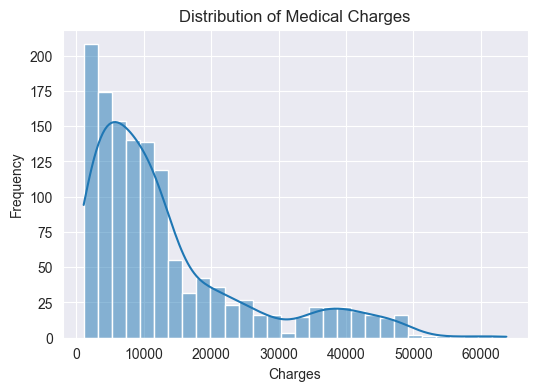

In [4]:
#Plot a histogram for the target variable "charges" to inspect its distribution
#Set the size of the figure
plt.figure(figsize=(6,4))
#Plot histogram with kernel density estimate
sns.histplot(df["charges"], kde=True)
#Set the title of the plot
plt.title("Distribution of Medical Charges")
#Label the x-axis
plt.xlabel("Charges")
#Label the y-axis
plt.ylabel("Frequency")
#Display the plot
plt.show()

Step 3 - Data Preparation

In [5]:
#Display the column names to understand which are categorical and numerical
print("\nColumns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
#Numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns:")
print(numerical_cols)

Numerical columns:
Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [7]:
#Categorical columns
categorical_cols = df.select_dtypes(include=['object','category','bool']).columns
print("\nCategorical columns:")
print(categorical_cols)


Categorical columns:
Index(['sex', 'smoker', 'region'], dtype='object')


In [8]:
#Identify categorical columns
categorical_cols = ["sex", "smoker", "region"]


In [9]:
#Identify numerical columns by taking all columns except categorical and target
numerical_cols = [col for col in df.columns if col not in categorical_cols + ["charges"]]

#Print categorical and numerical column lists for verification
print("\nCategorical columns:")
print(categorical_cols)
print("\nNumerical columns:")
print(numerical_cols)


Categorical columns:
['sex', 'smoker', 'region']

Numerical columns:
['age', 'bmi', 'children']


In [11]:
#Use pandas get_dummies to one-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Print the first 5 rows of the encoded DataFrame
print("\nFirst 5 rows after one-hot encoding:")
print(df_encoded.head())


First 5 rows after one-hot encoding:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  



Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


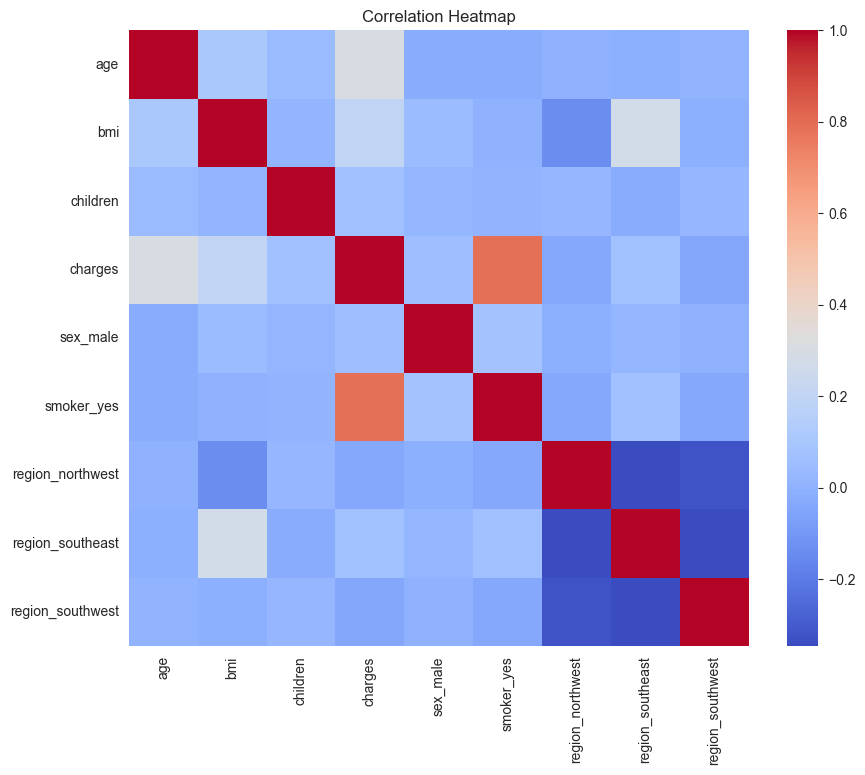

In [12]:
#Separate features (X) and target (y)
#Drop the target column from features
X = df_encoded.drop("charges",axis=1)
#Target variable is medical charges
y = df_encoded["charges"]

#Import train_test_split to create training and test sets
from sklearn.model_selection import train_test_split

#Splot the data into training and test sets
#test_size=0.2 means 20 percent of data goes to test set
#random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print shapes of the resulting datasets to verify the split
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

#Correlation Heatmap (after encoding)
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(),cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Step 4 - Modelling

In [13]:
#Import Linear Regression
from sklearn.linear_model import LinearRegression
#Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Create Linear Regression model
#Initialise Linear Regression
lin_reg = LinearRegression()

#Train Linear Regression model
#Fit the linear regression
lin_reg.fit(X_train, y_train)

#Create Random Forest model
#Initialise Random Forest
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)

#Train Random Forest model
#Fit Random Forest
rf_reg.fit(X_train, y_train)

print("Linear Regression and Random Forest models trained successfully")

Linear Regression and Random Forest models trained successfully


Step 5 - Evaluation

In [14]:
from sklearn.metrics import mean_squared_error
#Import evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score

#----------------------------------
#Predictions for both models
#----------------------------------

#Predictions from Linear Regression
y_pred_lin = lin_reg.predict(X_test)

#Predictons from Random Forest
y_pred_rf = rf_reg.predict(X_test)

#--------------------------------------
#Function to print evaluation results
#--------------------------------------

def print_reg_results(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred) #MAE
    mse = mean_squared_error (y_true, y_pred) #MSE
    rmse = np.sqrt(mse)                       #RMSE
    r2 = r2_score(y_true, y_pred)             #R-squared
    print(F"\n{name} Results")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.4f}")

#Print results for both models
print_reg_results("Linear Regression", y_test, y_pred_lin)
print_reg_results("Random Forest Regression", y_test, y_pred_rf)


Linear Regression Results
MAE: 4181.19
MSE: 33596915.85
RMSE: 5796.28
R2: 0.7836

Random Forest Regression Results
MAE: 2560.04
MSE: 21040526.12
RMSE: 4587.00
R2: 0.8645


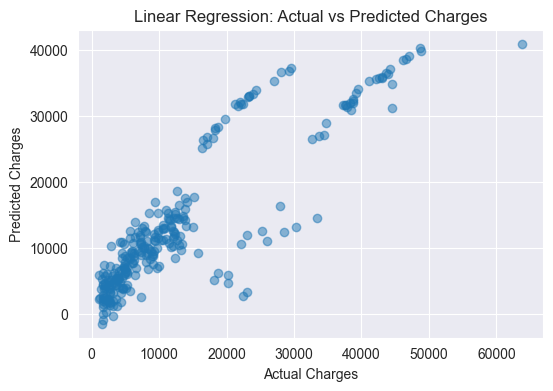

In [15]:
#Plot 1: Actual vs Predicted (Linear Regression)
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression: Actual vs Predicted Charges")
plt.grid(True)
plt.show()

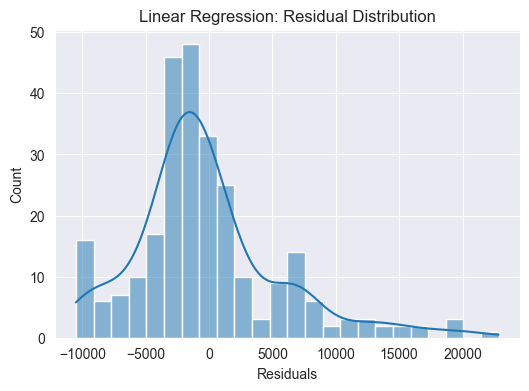

In [16]:
#Plot 2: Residuals (Linear Regression)
residuals_lin = y_test - y_pred_lin

plt.figure(figsize=(6,4))
sns.histplot(residuals_lin, kde=True)
plt.title("Linear Regression: Residual Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

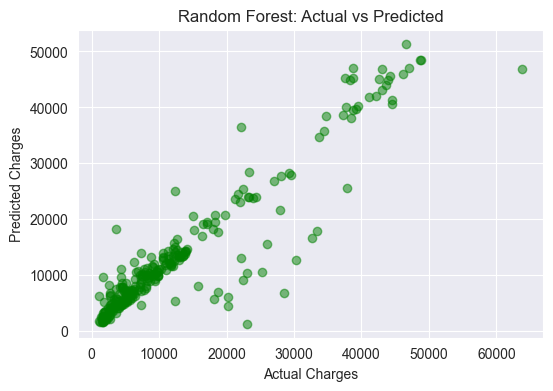

In [17]:
#Plot 3:Actual vs Predicted (Random Forest)
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="green")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()

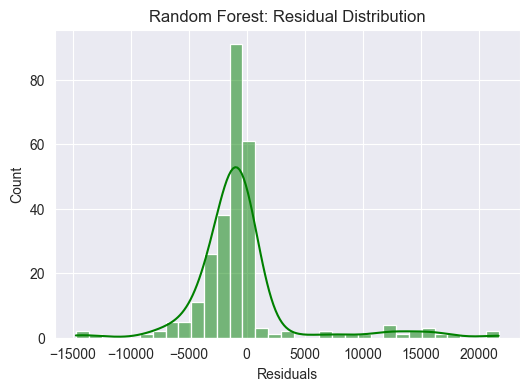

In [18]:
#Plot 4: Residuals (Random Forest)
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(6,4))
sns.histplot(residuals_rf, kde=True, color="green")
plt.title("Random Forest: Residual Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

Step 6 - Deployment and Next Steps

In [19]:
#Import joblib to save and load the trained model
#Import joblib for saving and loading models
import joblib

#Define a filename for the saved model (Random Forest used as final model)
model_filename = "insurance_random_forest_model.joblib"
#Save the trained Random Forest model to a file
joblib.dump(rf_reg, model_filename)

#Print a confirmation message that model is saved
#Confirm model is saved
print(f"Trained Random Forest model saved as: {model_filename}")

Trained Random Forest model saved as: insurance_random_forest_model.joblib
